In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
hospital_data = pd.read_csv("/content/drive/MyDrive/hospital_dataset (1).csv")
hospital_data.head()

,NAME,CITY,STATE,ZIP,TYPE,STATUS,LOCATION,COUNTYFIPS,COUNTRY,NAICS_DESC,WEBSITE,BEDS,RATING,FEES(AVG.),Latitude,Longitude
0,CENTRAL VALLEY GENERAL HOSPITAL,HANFORD,CA,93230,GENERAL ACUTE CARE,CLOSED,KINGS,6031,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.hanfordhealth.com,49,4.2,500,36.2939,-119.70858
1,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,WESTLAKE VILAGE,CA,91362,GENERAL ACUTE CARE,OPEN,VENTURA,6111,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.losrobleshospital.com,62,4.0,750,34.1611,-118.81448
2,EAST LOS ANGELES DOCTORS HOSPITAL,LOS ANGELES,CA,90023,GENERAL ACUTE CARE,OPEN,LOS ANGELES,6037,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.elalax.com,127,4.6,300,34.0224,-118.21759
3,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,HOLLYWOOD,CA,90028,GENERAL ACUTE CARE,OPEN,LOS ANGELES,6037,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://sch-hollywood.com/,100,3.8,400,34.0990,-118.32586
4,KINDRED HOSPITAL BALDWIN PARK,BALDWIN PARK,CA,91706,GENERAL ACUTE CARE,OPEN,LOS ANGELES,6037,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.khbaldwinpark.com,95,4.3,500,34.0646,-117.98628


In [ ]:
patient_data = pd.read_csv("/content/drive/MyDrive/patients_data (1).csv")
patient_data.head()

,Name,TYPE,INCOME,LOCATION,ZIP,Latitude,Longitude
0,Michelle Smith,LONG TERM CARE,50000,SANTA CLARA,95050,37.3541,-121.9552
1,Richard Martin,REHABILITATION,40000,VISALIA,93291,36.3302,-119.2921
2,Heather Mcpherson,SPECIAL,16000,CORONA,92879,33.8327,-117.5739
3,Kristen Rose,GENERAL ACUTE CARE,70000,WESTLAKE VILLAGE,91361,34.1478,-118.8070
4,Carrie Richardson,SPECIAL,100000,HOLLYWOOD,90028,34.0928,-118.3287


In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data):
    recommended_hospitals = []
    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Create user-item matrix
        user_item_matrix = pd.DataFrame(index=eligible_hospitals.index, columns=['Rating'])
        user_item_matrix['Rating'] = eligible_hospitals['RATING']

        # Normalize ratings in the user-item matrix
        scaler = MinMaxScaler()
        user_item_matrix['Rating'] = scaler.fit_transform(user_item_matrix[['Rating']])

        # Compute similarity between user (patient) and items (hospitals)
        similarity_scores = cosine_similarity(user_item_matrix.fillna(0))
        similarity_scores = pd.DataFrame(similarity_scores, index=eligible_hospitals.index, columns=eligible_hospitals.index)

        # Debugging: Print user-item matrix and similarity scores
        print("User-Item Matrix:")
        print(user_item_matrix)
        print("\nSimilarity Scores:")
        print(similarity_scores)

        recommended_hospitals_for_patient = []

        for index, hospital in eligible_hospitals.iterrows():
            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Retrieve similarity score for the hospital
            similarity_score = similarity_scores.loc[index, :].mean()  # Compute mean similarity across all hospitals

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Fees': hospital['FEES(AVG.)'],
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Sort recommended hospitals by distance, fees, rating, and similarity score
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], x['Fees'], -x['Rating'], -x['Similarity_Score']), reverse=False)

        # Get top 5 recommended hospitals for the patient
        top_5_hospitals = sorted_hospitals[:5]

        recommended_hospitals.extend(top_5_hospitals)

    return pd.DataFrame(recommended_hospitals)

# Assuming patient_data and hospital_data are defined elsewhere

# Get top 5 recommended hospitals for each patient
recommended_hospitals = recommend_hospitals(patient_data, hospital_data)

# Print top 5 recommended hospitals for each patient
grouped_recommendations = recommended_hospitals.groupby('Patient_Name')
for patient_name, group in grouped_recommendations:
    print(f"Top 5 recommended hospitals for {patient_name}:")
    print(group[['Hospital_Name', 'Distance (km)', 'Income', 'Fees', 'Rating', 'Similarity_Score']])
    print("\n")


Streaming output truncated to the last 5000 lines.
339  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0
347  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0
424  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
495  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0
User-Item Matrix:
     Rating
0     0.800
1     0.750
2     0.900
3     0.700
4     0.825
..      ...
504   0.375
505   0.700
506   1.000
507   0.325
508   0.900

[351 rows x 1 columns]

Similarity Scores:
     0    1    2    3    4    5    6    7    9    10   ...  497  498  499  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
..   

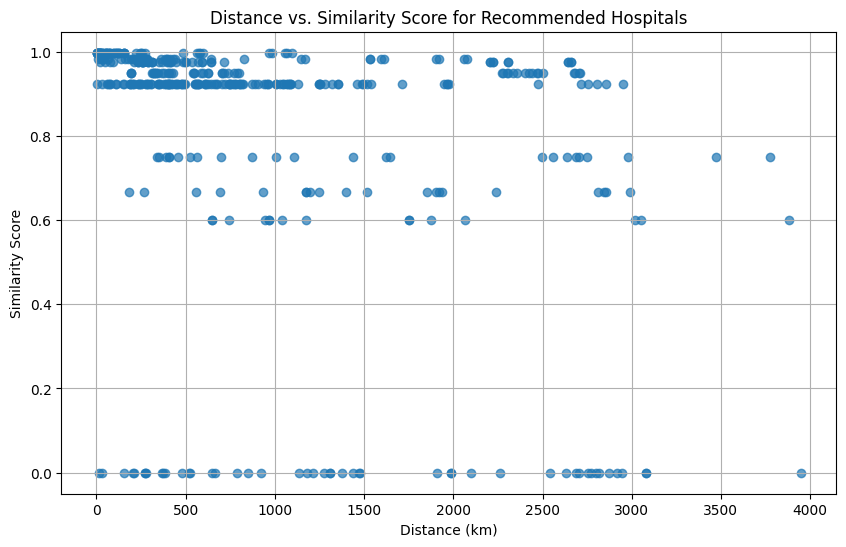

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Distance vs. Similarity Score
plt.figure(figsize=(10, 6))
plt.scatter(recommended_hospitals['Distance (km)'], recommended_hospitals['Similarity_Score'], alpha=0.7)
plt.xlabel('Distance (km)')
plt.ylabel('Similarity Score')
plt.title('Distance vs. Similarity Score for Recommended Hospitals')
plt.grid(True)
plt.show()


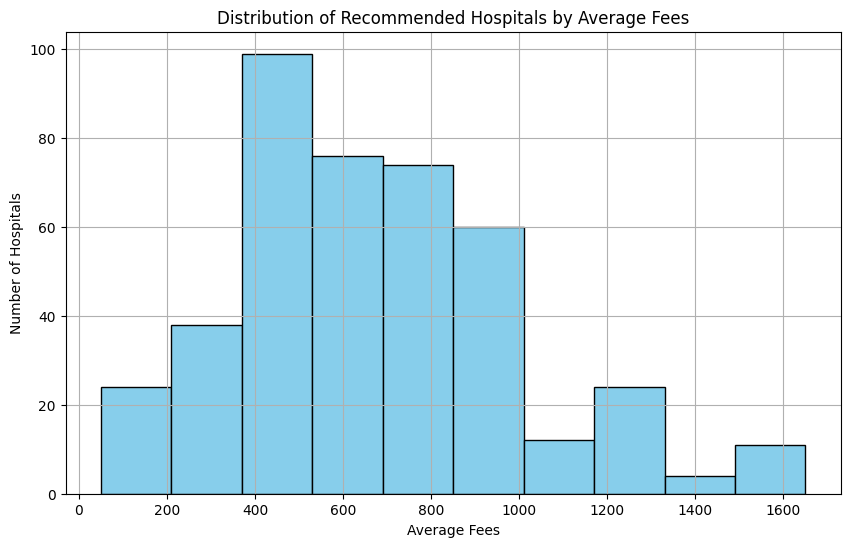

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Distribution of Recommended Hospitals by Average Fees
plt.figure(figsize=(10, 6))
plt.hist(recommended_hospitals['Fees'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Fees')
plt.ylabel('Number of Hospitals')
plt.title('Distribution of Recommended Hospitals by Average Fees')
plt.grid(True)
plt.show()


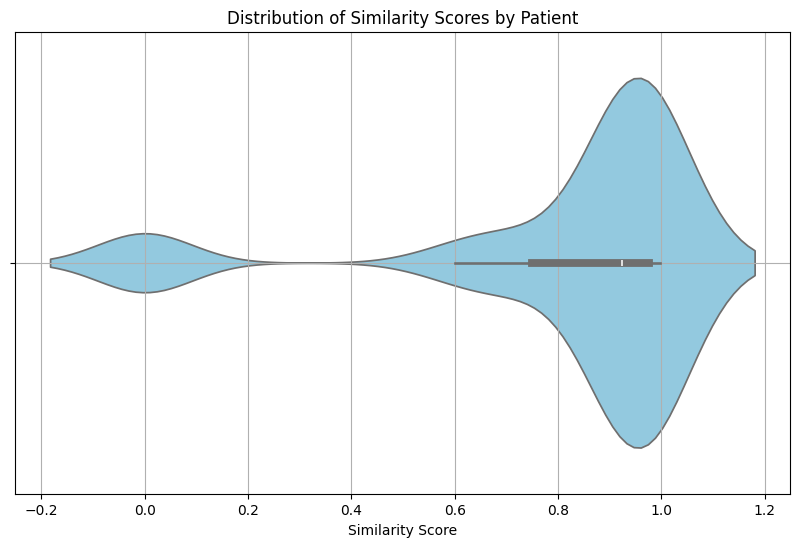

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for Distribution of Similarity Scores by Patient
plt.figure(figsize=(10, 6))
sns.violinplot(x=recommended_hospitals['Similarity_Score'], orient='h', color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Distribution of Similarity Scores by Patient')
plt.grid(True)
plt.show()

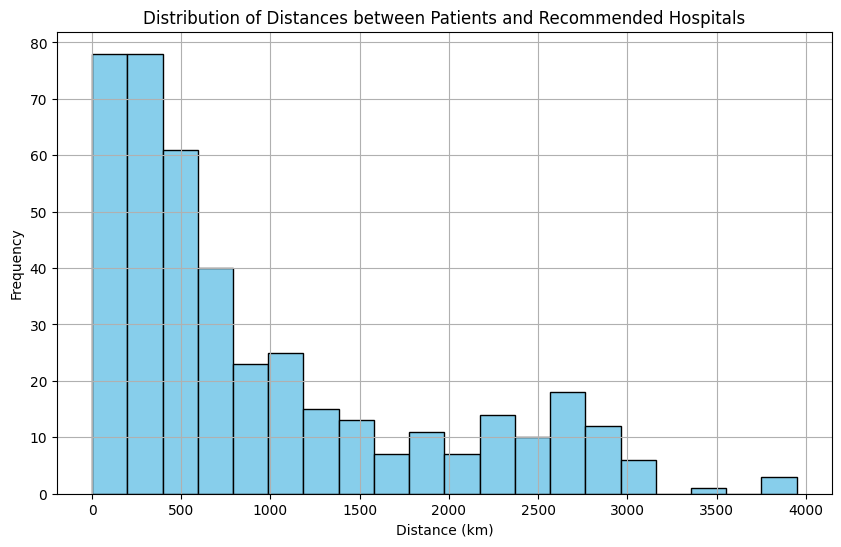

In [ ]:
import matplotlib.pyplot as plt

# Histogram for Distance Distribution
plt.figure(figsize=(10, 6))
plt.hist(recommended_hospitals['Distance (km)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances between Patients and Recommended Hospitals')
plt.grid(True)
plt.show()


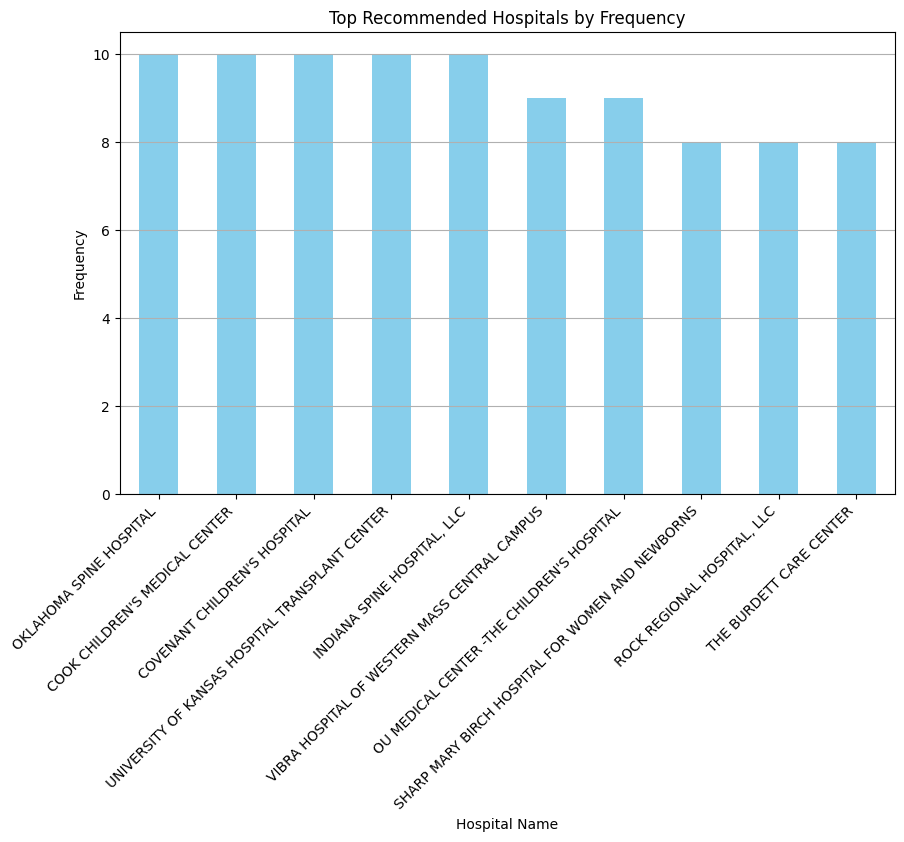

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Top Hospitals by Frequency
plt.figure(figsize=(10, 6))
top_hospitals = recommended_hospitals['Hospital_Name'].value_counts().nlargest(10)
top_hospitals.plot(kind='bar', color='skyblue')
plt.xlabel('Hospital Name')
plt.ylabel('Frequency')
plt.title('Top Recommended Hospitals by Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


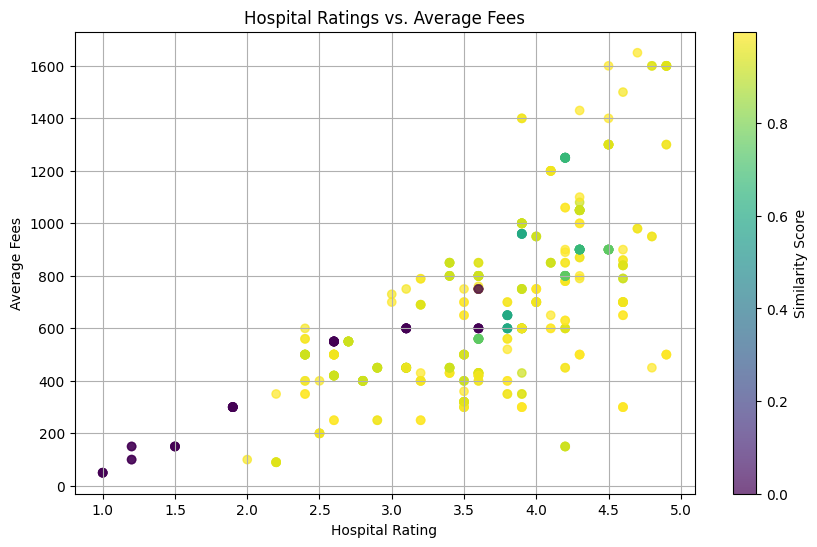

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Hospital Ratings vs. Average Fees
plt.figure(figsize=(10, 6))
plt.scatter(recommended_hospitals['Rating'], recommended_hospitals['Fees'], c=recommended_hospitals['Similarity_Score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Similarity Score')
plt.xlabel('Hospital Rating')
plt.ylabel('Average Fees')
plt.title('Hospital Ratings vs. Average Fees')
plt.grid(True)
plt.show()


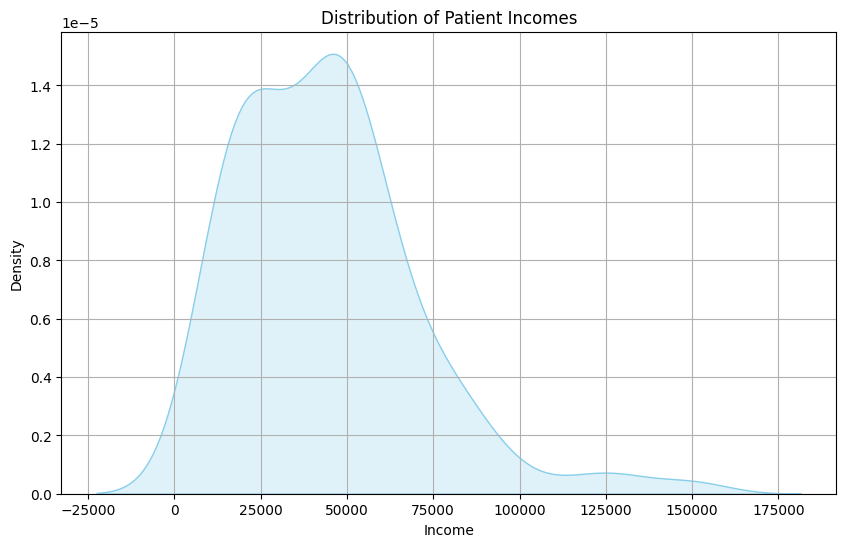

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot for Patient Income Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(patient_data['INCOME'], color='skyblue', fill=True)
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Distribution of Patient Incomes')
plt.grid(True)
plt.show()


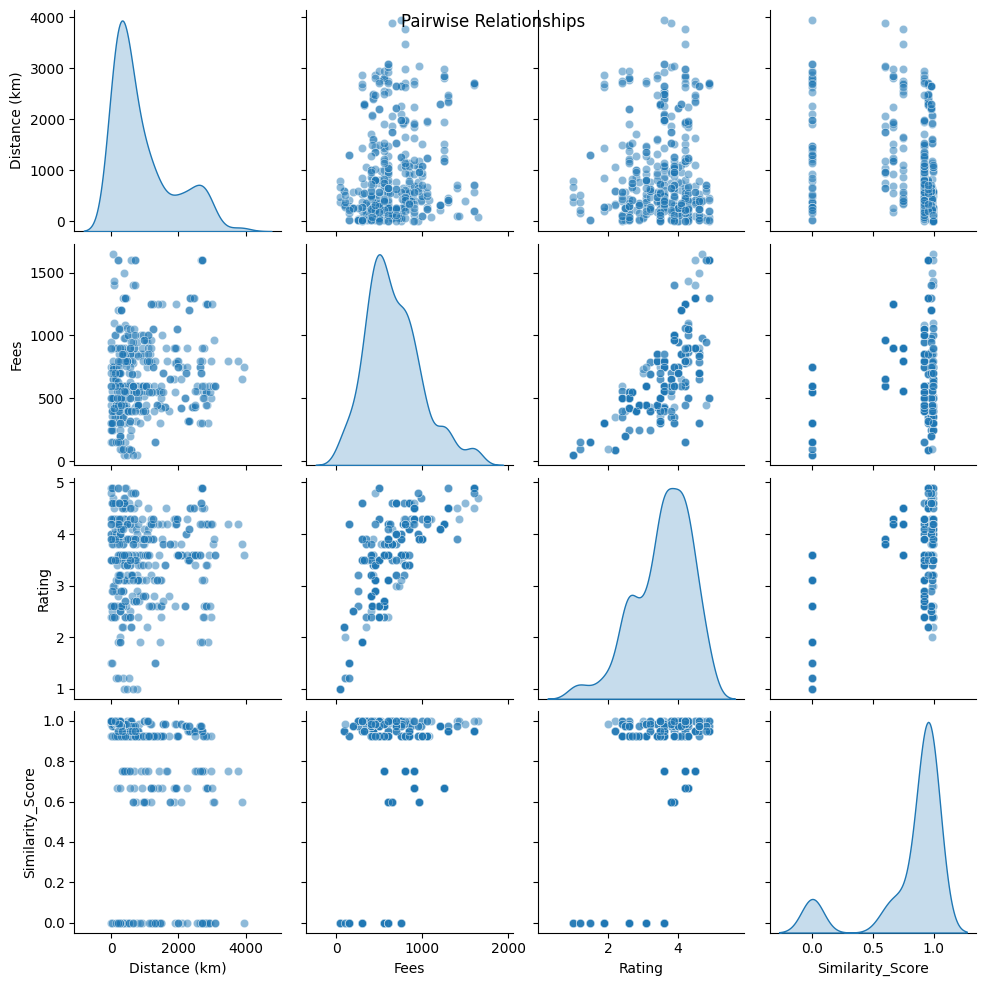

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for Multivariate Analysis
sns.pairplot(recommended_hospitals[['Distance (km)', 'Fees', 'Rating', 'Similarity_Score']], diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships')
plt.show()


In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data, k=5):
    recommended_hospitals = []

    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Prepare hospital features for k-NN
        hospital_features = eligible_hospitals[['Latitude', 'Longitude', 'FEES(AVG.)', 'RATING']]
        scaler = MinMaxScaler()
        hospital_features = scaler.fit_transform(hospital_features)

        # Fit k-NN model on hospital features
        knn = NearestNeighbors(n_neighbors=min(k, len(eligible_hospitals)), algorithm='ball_tree')
        knn.fit(hospital_features)

        # Find k nearest hospitals to the patient
        distances, indices = knn.kneighbors([[
            patient['Latitude'],
            patient['Longitude'],
            patient['INCOME'],
            0  # Placeholder for rating
        ]])

        recommended_hospitals_for_patient = []

        for idx in indices.flatten():
            if idx >= len(eligible_hospitals):  # Check if the index is within bounds
                continue

            hospital = eligible_hospitals.iloc[idx]

            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Calculate similarity score based on distance
            similarity_score = 1 / (1 + distance)  # Inverse of distance

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Fees': hospital['FEES(AVG.)'],
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Sort recommended hospitals by distance, fees, and rating
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], x['Fees'], -x['Rating']), reverse=False)

        # Get top k recommended hospitals for the patient
        top_k_hospitals = sorted_hospitals[:k]

        recommended_hospitals.extend(top_k_hospitals)

    return pd.DataFrame(recommended_hospitals)

# Assuming patient_data and hospital_data are defined elsewhere

# Get top 5 recommended hospitals for each patient using k-NN
recommended_hospitals = recommend_hospitals(patient_data, hospital_data)

# Print top 5 recommended hospitals for each patient
grouped_recommendations = recommended_hospitals.groupby('Patient_Name')
for patient_name, group in grouped_recommendations:
    print(f"Top 5 recommended hospitals for {patient_name}:")
    print(group[['Hospital_Name', 'Distance (km)', 'Income', 'Fees', 'Rating', 'Similarity_Score']])
    print("\n")


Top 5 recommended hospitals for Abigail Collier:
                                         Hospital_Name  Distance (km)  Income  \
190                            THE BURDETT CARE CENTER     522.763279   63000   
191  NORTHWEST MEDICAL CENTER - WILLOW CREEK WOMEN'...    1008.771072   63000   
192      NORTON WOMEN'S AND KOSAIR CHILDREN'S HOSPITAL    1106.730896   63000   
193   SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS    2704.971772   63000   

     Fees  Rating  Similarity_Score  
190   600     3.1          0.001909  
191   560     3.6          0.000990  
192   900     4.5          0.000903  
193   800     4.2          0.000370  


Top 5 recommended hospitals for Adam Greene:
                                Hospital_Name  Distance (km)  Income  Fees  \
293       VANTAGE POINT OF NORTHWEST ARKANSAS     717.413221   25000  1400   
294                         OUR LADY OF PEACE    1071.762905   25000  1600   
295              HUTCHINGS PSYCHIATRIC CENTER    1088.571990   25000  1300

In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data, k=5):
    recommended_hospitals = []

    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Prepare hospital features for k-NN
        hospital_features = eligible_hospitals[['Latitude', 'Longitude', 'FEES(AVG.)', 'RATING']]
        scaler = MinMaxScaler()
        hospital_features = scaler.fit_transform(hospital_features)

        # Fit k-NN model on hospital features
        knn = NearestNeighbors(n_neighbors=min(k, len(eligible_hospitals)), algorithm='ball_tree')
        knn.fit(hospital_features)

        # Find k nearest hospitals to the patient
        distances, indices = knn.kneighbors([[
            patient['Latitude'],
            patient['Longitude'],
            patient['INCOME'],
            0  # Placeholder for rating
        ]])

        recommended_hospitals_for_patient = []

        for idx in indices.flatten():
            if idx >= len(eligible_hospitals):  # Check if the index is within bounds
                continue

            hospital = eligible_hospitals.iloc[idx]

            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Calculate similarity score based on distance
            similarity_score = 1 / (1 + distance)  # Inverse of distance

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Fees': hospital['FEES(AVG.)'],
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Sort recommended hospitals by distance, fees, and rating
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], x['Fees'], -x['Rating']), reverse=False)

        # Get top k recommended hospitals for the patient
        top_k_hospitals = sorted_hospitals[:k]

        recommended_hospitals.extend(top_k_hospitals)

    return pd.DataFrame(recommended_hospitals)

def calculate_relevance_score(recommended_hospitals):
    relevance_scores = []

    for _, group in recommended_hospitals.groupby('Patient_Name'):
        relevance_score = group['Similarity_Score'].mean()  # Average similarity score across all recommendations for each patient
        relevance_scores.append(relevance_score)

    # Calculate the overall average relevance score
    overall_relevance_score = sum(relevance_scores) / len(relevance_scores)
    return overall_relevance_score

# Assuming patient_data and hospital_data are defined elsewhere

# Get recommended hospitals
recommended_hospitals = recommend_hospitals(patient_data, hospital_data)

# Calculate overall average relevance score
overall_relevance_score = calculate_relevance_score(recommended_hospitals)
print("Overall Average Relevance Score:", overall_relevance_score)


Overall Average Relevance Score: 0.0016393760375600398


In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data, k=5):
    recommended_hospitals = []

    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Prepare hospital features for k-NN
        hospital_features = eligible_hospitals[['Latitude', 'Longitude', 'FEES(AVG.)', 'RATING']]
        scaler = MinMaxScaler()
        hospital_features = scaler.fit_transform(hospital_features)

        # Fit k-NN model on hospital features
        knn = NearestNeighbors(n_neighbors=min(k, len(eligible_hospitals)), algorithm='ball_tree', metric='euclidean')
        knn.fit(hospital_features)

        # Find k nearest hospitals to the patient
        distances, indices = knn.kneighbors([[
            patient['Latitude'],
            patient['Longitude'],
            patient['INCOME'],
            0  # Placeholder for rating
        ]])

        recommended_hospitals_for_patient = []

        for idx in indices.flatten():
            if idx >= len(eligible_hospitals):  # Check if the index is within bounds
                continue

            hospital = eligible_hospitals.iloc[idx]

            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Calculate similarity score based on distance
            similarity_score = 1 / (1 + distance)  # Inverse of distance

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Fees': hospital['FEES(AVG.)'],
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Sort recommended hospitals by distance, fees, and rating
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], x['Fees'], -x['Rating']), reverse=False)

        # Get top k recommended hospitals for the patient
        top_k_hospitals = sorted_hospitals[:k]

        recommended_hospitals.extend(top_k_hospitals)

    return pd.DataFrame(recommended_hospitals)

# Assuming patient_data and hospital_data are defined elsewhere

# Get top 5 recommended hospitals for each patient using k-NN with Euclidean distance
recommended_hospitals = recommend_hospitals(patient_data, hospital_data)

# Print top 5 recommended hospitals for each patient
grouped_recommendations = recommended_hospitals.groupby('Patient_Name')
for patient_name, group in grouped_recommendations:
    print(f"Top 5 recommended hospitals for {patient_name}:")
    print(group[['Hospital_Name', 'Distance (km)', 'Income', 'Fees', 'Rating', 'Similarity_Score']])
    print("\n")


Top 5 recommended hospitals for Abigail Collier:
                                         Hospital_Name  Distance (km)  Income  \
190                            THE BURDETT CARE CENTER     522.763279   63000   
191  NORTHWEST MEDICAL CENTER - WILLOW CREEK WOMEN'...    1008.771072   63000   
192      NORTON WOMEN'S AND KOSAIR CHILDREN'S HOSPITAL    1106.730896   63000   
193   SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS    2704.971772   63000   

     Fees  Rating  Similarity_Score  
190   600     3.1          0.001909  
191   560     3.6          0.000990  
192   900     4.5          0.000903  
193   800     4.2          0.000370  


Top 5 recommended hospitals for Adam Greene:
                                Hospital_Name  Distance (km)  Income  Fees  \
293       VANTAGE POINT OF NORTHWEST ARKANSAS     717.413221   25000  1400   
294                         OUR LADY OF PEACE    1071.762905   25000  1600   
295              HUTCHINGS PSYCHIATRIC CENTER    1088.571990   25000  1300

In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data, k=5):
    recommended_hospitals = []

    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Prepare hospital features for k-NN
        hospital_features = eligible_hospitals[['Latitude', 'Longitude', 'FEES(AVG.)', 'RATING']]
        scaler = MinMaxScaler()
        hospital_features = scaler.fit_transform(hospital_features)

        # Fit k-NN model on hospital features using cosine similarity
        knn = NearestNeighbors(n_neighbors=min(k, len(eligible_hospitals)), algorithm='brute', metric='cosine')
        knn.fit(hospital_features)

        # Find k nearest hospitals to the patient
        distances, indices = knn.kneighbors([[
            patient['Latitude'],
            patient['Longitude'],
            patient['INCOME'],
            0  # Placeholder for rating
        ]])

        recommended_hospitals_for_patient = []

        for idx in indices.flatten():
            if idx >= len(eligible_hospitals):  # Check if the index is within bounds
                continue

            hospital = eligible_hospitals.iloc[idx]

            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Calculate similarity score based on distance
            similarity_score = 1 / (1 + distance)  # Inverse of distance

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Fees': hospital['FEES(AVG.)'],
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Sort recommended hospitals by distance, fees, and rating
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], x['Fees'], -x['Rating']), reverse=False)

        # Get top k recommended hospitals for the patient
        top_k_hospitals = sorted_hospitals[:k]

        recommended_hospitals.extend(top_k_hospitals)

    return pd.DataFrame(recommended_hospitals)

# Assuming patient_data and hospital_data are defined elsewhere

# Get top 5 recommended hospitals for each patient using k-NN with cosine similarity
recommended_hospitals = recommend_hospitals(patient_data, hospital_data)

# Print top 5 recommended hospitals for each patient
grouped_recommendations = recommended_hospitals.groupby('Patient_Name')
for patient_name, group in grouped_recommendations:
    print(f"Top 5 recommended hospitals for {patient_name}:")
    print(group[['Hospital_Name', 'Distance (km)', 'Income', 'Fees', 'Rating', 'Similarity_Score']])
    print("\n")


Top 5 recommended hospitals for Abigail Collier:
                                         Hospital_Name  Distance (km)  Income  \
190                            THE BURDETT CARE CENTER     522.763279   63000   
191  NORTHWEST MEDICAL CENTER - WILLOW CREEK WOMEN'...    1008.771072   63000   
192      NORTON WOMEN'S AND KOSAIR CHILDREN'S HOSPITAL    1106.730896   63000   
193   SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS    2704.971772   63000   

     Fees  Rating  Similarity_Score  
190   600     3.1          0.001909  
191   560     3.6          0.000990  
192   900     4.5          0.000903  
193   800     4.2          0.000370  


Top 5 recommended hospitals for Adam Greene:
                                 Hospital_Name  Distance (km)  Income  Fees  \
293           CENTRAL LOUISIANA STATE HOSPITAL     592.255049   25000   950   
294        VANTAGE POINT OF NORTHWEST ARKANSAS     717.413221   25000  1400   
295              VERITAS COLLABORATIVE GEORGIA    1388.179626   25000  

In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data, k=5):
    recommended_hospitals = []
    relevance_scores = []  # List to store individual relevance scores

    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Prepare hospital features for k-NN
        hospital_features = eligible_hospitals[['Latitude', 'Longitude', 'FEES(AVG.)', 'RATING']]
        scaler = MinMaxScaler()
        hospital_features = scaler.fit_transform(hospital_features)

        # Fit k-NN model on hospital features using cosine similarity
        knn = NearestNeighbors(n_neighbors=min(k, len(eligible_hospitals)), algorithm='brute', metric='cosine')
        knn.fit(hospital_features)

        # Find k nearest hospitals to the patient
        distances, indices = knn.kneighbors([[
            patient['Latitude'],
            patient['Longitude'],
            patient['INCOME'],
            0  # Placeholder for rating
        ]])

        recommended_hospitals_for_patient = []

        for idx in indices.flatten():
            if idx >= len(eligible_hospitals):  # Check if the index is within bounds
                continue

            hospital = eligible_hospitals.iloc[idx]

            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Calculate similarity score based on distance
            similarity_score = 1 / (1 + distance)  # Inverse of distance
            relevance_scores.append(similarity_score)  # Add relevance score to the list

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Fees': hospital['FEES(AVG.)'],
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Sort recommended hospitals by distance, fees, and rating
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], x['Fees'], -x['Rating']), reverse=False)

        # Get top k recommended hospitals for the patient
        top_k_hospitals = sorted_hospitals[:k]

        recommended_hospitals.extend(top_k_hospitals)

    # Compute the overall average relevance score
    overall_avg_relevance_score = sum(relevance_scores) / len(relevance_scores)

    return pd.DataFrame(recommended_hospitals), overall_avg_relevance_score

# Assuming patient_data and hospital_data are defined elsewhere

# Get top 5 recommended hospitals for each patient using k-NN with cosine similarity
recommended_hospitals, overall_avg_score = recommend_hospitals(patient_data, hospital_data)

# Print top 5 recommended hospitals for each patient
grouped_recommendations = recommended_hospitals.groupby('Patient_Name')
for patient_name, group in grouped_recommendations:
    print(f"Top 5 recommended hospitals for {patient_name}:")
    print(group[['Hospital_Name', 'Distance (km)', 'Income', 'Fees', 'Rating', 'Similarity_Score']])
    print("\n")

# Print overall average relevance score
print(f"Overall Average Relevance Score: {overall_avg_score}")


Top 5 recommended hospitals for Abigail Collier:
                                         Hospital_Name  Distance (km)  Income  \
190                            THE BURDETT CARE CENTER     522.763279   63000   
191  NORTHWEST MEDICAL CENTER - WILLOW CREEK WOMEN'...    1008.771072   63000   
192      NORTON WOMEN'S AND KOSAIR CHILDREN'S HOSPITAL    1106.730896   63000   
193   SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS    2704.971772   63000   

     Fees  Rating  Similarity_Score  
190   600     3.1          0.001909  
191   560     3.6          0.000990  
192   900     4.5          0.000903  
193   800     4.2          0.000370  


Top 5 recommended hospitals for Adam Greene:
                                 Hospital_Name  Distance (km)  Income  Fees  \
293           CENTRAL LOUISIANA STATE HOSPITAL     592.255049   25000   950   
294        VANTAGE POINT OF NORTHWEST ARKANSAS     717.413221   25000  1400   
295              VERITAS COLLABORATIVE GEORGIA    1388.179626   25000  

In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def recommend_hospitals(patient_data, hospital_data, k=5):
    recommended_hospitals = []
    relevance_scores = []  # List to store individual relevance scores

    for i, patient in patient_data.iterrows():
        patient_location = (patient['Latitude'], patient['Longitude'])
        patient_income = patient['INCOME']
        patient_disease = patient['TYPE']

        # Filter hospital data based on matching disease type
        eligible_hospitals = hospital_data[hospital_data['TYPE'] == patient_disease]

        # Filter hospitals based on patient income
        eligible_hospitals = eligible_hospitals[eligible_hospitals['FEES(AVG.)'] <= patient_income]

        if eligible_hospitals.empty:
            # Skip recommendation if no eligible hospitals found for the patient
            continue

        # Prepare hospital features for k-NN
        hospital_features = eligible_hospitals[['Latitude', 'Longitude', 'RATING']]
        scaler = MinMaxScaler()
        hospital_features = scaler.fit_transform(hospital_features)

        # Fit k-NN model on hospital features using cosine similarity
        knn = NearestNeighbors(n_neighbors=min(k, len(eligible_hospitals)), algorithm='brute', metric='cosine')
        knn.fit(hospital_features)

        # Find k nearest hospitals to the patient
        distances, indices = knn.kneighbors([[
            patient['Latitude'],
            patient['Longitude'],
            0  # Placeholder for rating
        ]])

        recommended_hospitals_for_patient = []

        for idx in indices.flatten():
            if idx >= len(eligible_hospitals):  # Check if the index is within bounds
                continue

            hospital = eligible_hospitals.iloc[idx]

            # Calculate distance from patient to each hospital
            hospital_location = (hospital['Latitude'], hospital['Longitude'])
            distance = geodesic(patient_location, hospital_location).kilometers

            # Calculate similarity score based on distance
            similarity_score = 1 / (1 + distance)  # Inverse of distance
            relevance_scores.append(similarity_score)  # Add relevance score to the list

            recommended_hospitals_for_patient.append({
                'Patient_Name': patient['Name'],
                'Hospital_Name': hospital['NAME'],
                'Distance (km)': distance,
                'Income': patient_income,
                'Rating': hospital['RATING'],
                'Similarity_Score': similarity_score
            })

        # Normalize distance and rating between 0 and 1
        max_distance = max([hospital['Distance (km)'] for hospital in recommended_hospitals_for_patient])
        min_distance = min([hospital['Distance (km)'] for hospital in recommended_hospitals_for_patient])
        max_rating = max([hospital['Rating'] for hospital in recommended_hospitals_for_patient])
        min_rating = min([hospital['Rating'] for hospital in recommended_hospitals_for_patient])

        for hospital in recommended_hospitals_for_patient:
            hospital['Distance (km)'] = (hospital['Distance (km)'] - min_distance) / (max_distance - min_distance)
            hospital['Rating'] = (hospital['Rating'] - min_rating) / (max_rating - min_rating)

        # Sort recommended hospitals by distance and rating
        sorted_hospitals = sorted(recommended_hospitals_for_patient, key=lambda x: (x['Distance (km)'], -x['Rating']), reverse=False)

        # Get top k recommended hospitals for the patient
        top_k_hospitals = sorted_hospitals[:k]

        recommended_hospitals.extend(top_k_hospitals)

    # Compute the overall average relevance score
    overall_avg_relevance_score = sum(relevance_scores) / len(relevance_scores)

    return pd.DataFrame(recommended_hospitals), overall_avg_relevance_score

# Assuming patient_data and hospital_data are defined elsewhere

# Get top 5 recommended hospitals for each patient using k-NN with cosine similarity
recommended_hospitals, overall_avg_score = recommend_hospitals(patient_data, hospital_data)

# Print top 5 recommended hospitals for each patient
grouped_recommendations = recommended_hospitals.groupby('Patient_Name')
for patient_name, group in grouped_recommendations:
    print(f"Top 5 recommended hospitals for {patient_name}:")
    print(group[['Hospital_Name', 'Distance (km)', 'Income', 'Rating', 'Similarity_Score']])
    print("\n")

# Print overall average relevance score
print(f"Overall Average Relevance Score: {overall_avg_score}")


Top 5 recommended hospitals for Abigail Collier:
                                         Hospital_Name  Distance (km)  Income  \
190                            THE BURDETT CARE CENTER       0.000000   63000   
191  NORTHWEST MEDICAL CENTER - WILLOW CREEK WOMEN'...       0.222714   63000   
192      NORTON WOMEN'S AND KOSAIR CHILDREN'S HOSPITAL       0.267604   63000   
193   SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS       1.000000   63000   

       Rating  Similarity_Score  
190  0.000000          0.001909  
191  0.357143          0.000990  
192  1.000000          0.000903  
193  0.785714          0.000370  


Top 5 recommended hospitals for Adam Greene:
                             Hospital_Name  Distance (km)  Income    Rating  \
293                     RIVEREDGE HOSPITAL       0.000000   25000  0.000000   
294           STAR VIEW ADOLESCENT - P H F       0.712886   25000  0.000000   
295                    RIDGEVIEW INSTITUTE       0.967668   25000  0.500000   
296  ST. JOS